In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as tfms

In [9]:
from fastai.vision.all import *

In [10]:
dataset = datasets.MNIST(root="dataset/", download=True)

In [11]:
path = untar_data(URLs.MNIST)

In [12]:
path

Path('/root/.fastai/data/mnist_png')

In [13]:
fnames = get_image_files(path)

In [66]:
fnames

(#70000) [Path('/root/.fastai/data/mnist_png/training/7/9444.png'),Path('/root/.fastai/data/mnist_png/training/7/14605.png'),Path('/root/.fastai/data/mnist_png/training/7/13540.png'),Path('/root/.fastai/data/mnist_png/training/7/41244.png'),Path('/root/.fastai/data/mnist_png/training/7/14832.png'),Path('/root/.fastai/data/mnist_png/training/7/11829.png'),Path('/root/.fastai/data/mnist_png/training/7/51011.png'),Path('/root/.fastai/data/mnist_png/training/7/57526.png'),Path('/root/.fastai/data/mnist_png/training/7/48135.png'),Path('/root/.fastai/data/mnist_png/training/7/32363.png')...]

In [67]:
item_tfms = [
    # tfms.ToTensor(),
    # tfms.Normalize(mean=0.5, std=0.5)
]

In [68]:
dblock = DataBlock(
    blocks=[ImageBlock],
    get_items=get_image_files,
    item_tfms=item_tfms
)

In [69]:
dls = dblock.dataloaders(path, bs=3)

In [74]:
dls

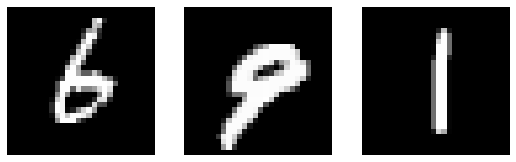

In [70]:
dls.show_batch()

### Hyperparameters

In [77]:
lr = 3e-4

In [81]:
z_dim = 64

In [80]:
img_dim = 28*28

### Generator's Learner

In [62]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, img_dim),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.gen(x)

In [83]:
gen_model = Generator(z_dim, img_dim)

In [84]:
loss_func = nn.BCELoss()

In [85]:
gen_opt = optim.Adam(gen_model.parameters(), lr=lr)

In [86]:
gen_learner = Learner(gen_model, loss_func, gen_opt)

In [88]:
gen_learner.fit(1)

IndexError: list index out of range